# Ejercicio 1: Predicción de Tendencias de Tráfico Web

## Objetivo: Predecir las tendencias futuras del tráfico web de un sitio popular utilizando datos historicos

In [ ]:
import pandas as pd

df_user = pd.read_csv('/content/sample_data/Netflix Userbase.csv')

date_variable = "Join Date"

In [ ]:
df_user

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
df_user[date_variable] = pd.to_datetime(df_user[date_variable])
#display(df_user.info())
df_user[date_variable] = df_user[date_variable].dt.strftime('%Y-%m')
df_user

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
#df_user_premium = df_user[df_user['Subscription Type'] == 'Basic']
df_user_group = df_user.groupby(date_variable).size().reset_index(name='Frecuencia')
df_user_group[date_variable] = pd.to_datetime(df_user_group[date_variable])
df_user_group[date_variable] = df_user_group[date_variable].dt.strftime('%Y-%m')
display(df_user_group)

,Join Date,Frecuencia
0,2021-05,3
1,2021-08,1
2,2021-09,4
3,2021-10,2
4,2021-11,2
5,2021-12,2
6,2022-01,81
7,2022-02,87
8,2022-03,97
9,2022-04,106


In [ ]:
df_data_train = df_user_group[df_user_group[date_variable] < '2023-01']
print(df_data_train["Frecuencia"].sum())
df_data_train

2462


,Join Date,Frecuencia
0,2021-05,3
1,2021-08,1
2,2021-09,4
3,2021-10,2
4,2021-11,2
5,2021-12,2
6,2022-01,81
7,2022-02,87
8,2022-03,97
9,2022-04,106


In [ ]:
#Subconjunto de prueba que es del 2023 para adelante
df_data_test = df_user_group[df_user_group[date_variable] >= "2023-01"]
print(df_data_test["Frecuencia"].sum())
display(df_data_test)

38


,Join Date,Frecuencia
18,2023-01,7
19,2023-02,5
20,2023-03,6
21,2023-04,2
22,2023-05,3
23,2023-06,2
24,2023-07,3
25,2023-08,4
26,2023-09,1
27,2023-10,1


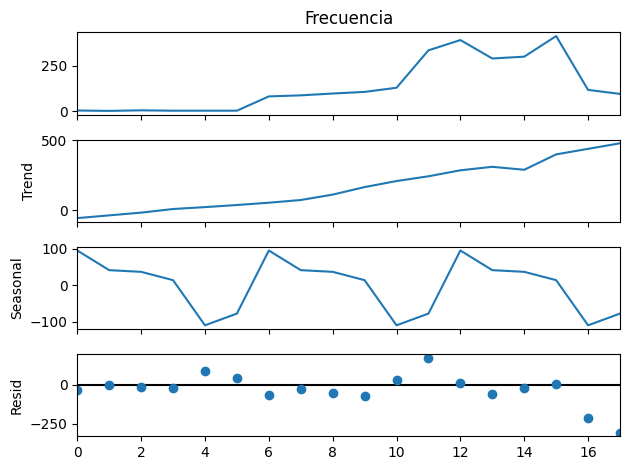

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Frecuencia, model='additive',extrapolate_trend='freq',period=6)

decompose.plot().show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Frecuencia, model='multiplicative',extrapolate_trend='freq',period=9)

decompose.plot().show()

In [ ]:
df_train_prophet = df_data_train

#ds = datestamp / Marca de Fecha
df_train_prophet.rename(columns={date_variable: "ds"},inplace=True)
df_train_prophet.rename(columns={"Frecuencia": "y"},inplace=True)

df_train_prophet

<ipython-input-191-97f1fe4841a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_prophet.rename(columns={date_variable: "ds"},inplace=True)
<ipython-input-191-97f1fe4841a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_prophet.rename(columns={"Frecuencia": "y"},inplace=True)


,ds,y
0,2021-05,3
1,2021-08,1
2,2021-09,4
3,2021-10,2
4,2021-11,2
5,2021-12,2
6,2022-01,81
7,2022-02,87
8,2022-03,97
9,2022-04,106


In [ ]:
from prophet import Prophet
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxfdzi8a/8zspr69z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxfdzi8a/yuctwpok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23578', 'data', 'file=/tmp/tmphxfdzi8a/8zspr69z.json', 'init=/tmp/tmphxfdzi8a/yuctwpok.json', 'output', 'file=/tmp/tmphxfdzi8a/prophet_model3xl6qd26/prophet_model-20240324165834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:58:34 - cmdstanpy - INFO - Chain [1] start processing
I

In [ ]:
df_future = model_prophet.make_future_dataframe(periods=12,freq='MS')
#df_future["ds"] = pd.to_datetime(df_future['ds'])
#df_future['ds'] = df_future['ds'].dt.strftime('%Y-%m')
display(df_future)


,ds
0,2021-05-01
1,2021-08-01
2,2021-09-01
3,2021-10-01
4,2021-11-01
5,2021-12-01
6,2022-01-01
7,2022-02-01
8,2022-03-01
9,2022-04-01


In [ ]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds','yhat','yhat_lower','yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
25,2023-08-01,444.0,312.0,572.0
26,2023-09-01,462.0,331.0,593.0
27,2023-10-01,480.0,360.0,605.0
28,2023-11-01,499.0,378.0,624.0
29,2023-12-01,517.0,397.0,644.0


<ipython-input-197-e1d958443840>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_test[date_variable] = pd.to_datetime(df_data_test[date_variable])


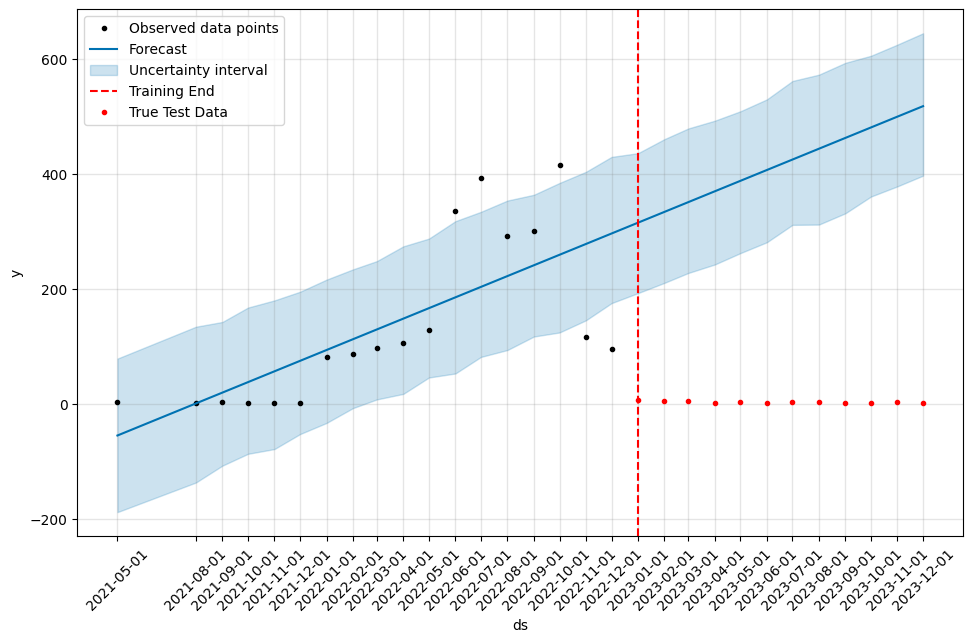

In [ ]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
df_data_test[date_variable] = pd.to_datetime(df_data_test[date_variable])
plt.plot(df_data_test[date_variable], df_data_test['Frecuencia'],'ro', markersize=3, label='True Test Data')
plt.xticks(forecast_prophet['ds'], rotation=45)

# show the legend to distinguish between the lines
plt.legend()

# EJERCICIO 2

In [ ]:
import pandas as pd

df_user = pd.read_csv('/content/sample_data/Netflix Userbase.csv')

In [ ]:
df_user_group = df_user.groupby('Join Date').size().reset_index(name='NewUsers')
df_user_group['Join Date'] = pd.to_datetime(df_user_group['Join Date'])
df_user_group.sort_values('Join Date')

df_data_train = df_user_group[df_user_group['Join Date'] < '2022-07-01']
df_data_train

,Join Date,NewUsers
0,2022-01-03,2
2,2022-01-06,3
3,2022-01-07,19
4,2022-01-08,13
5,2022-01-09,12
...,...,...
288,2022-05-30,4
289,2022-06-30,31
293,2021-10-30,1
295,2021-11-30,1


In [ ]:
#Subconjunto de prueba que es del 2023 para adelante
df_data_test = df_user_group[df_user_group['Join Date'] >= "2022-07-01"]
display(df_data_test)

,Join Date,NewUsers
1,2023-01-05,1
8,2023-02-04,1
11,2023-02-06,1
17,2023-03-02,2
37,2023-05-01,1
...,...,...
292,2022-09-30,13
294,2022-10-30,19
297,2022-07-31,12
298,2022-08-31,10


In [ ]:
df_train_prophet = df_data_train

#ds = datestamp / Marca de Fecha
df_train_prophet.rename(columns={"Join Date": "ds"},inplace=True)
df_train_prophet.rename(columns={"NewUsers": "y"},inplace=True)

df_train_prophet

<ipython-input-147-cdf16b759228>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_prophet.rename(columns={"Join Date": "ds"},inplace=True)
<ipython-input-147-cdf16b759228>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_prophet.rename(columns={"NewUsers": "y"},inplace=True)


,ds,y
0,2022-01-03,2
2,2022-01-06,3
3,2022-01-07,19
4,2022-01-08,13
5,2022-01-09,12
...,...,...
288,2022-05-30,4
289,2022-06-30,31
293,2021-10-30,1
295,2021-11-30,1


In [ ]:
from prophet import Prophet
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrxo6arz/68o6p046.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrxo6arz/9_zhlf3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5610', 'data', 'file=/tmp/tmphrxo6arz/68o6p046.json', 'init=/tmp/tmphrxo6arz/9_zhlf3n.json', 'output', 'file=/tmp/tmphrxo6arz/prophet_modelvphw5_ef/prophet_model-20240323185810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:58:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_future = model_prophet.make_future_dataframe(periods=18,freq='MS')

display(df_future)

,ds
0,2021-05-09
1,2021-05-11
2,2021-05-12
3,2021-08-10
4,2021-09-11
...,...
131,2023-08-01
132,2023-09-01
133,2023-10-01
134,2023-11-01


In [ ]:
df_data_train

,Join Date,NewUsers
0,2022-01-03,2
2,2022-01-06,3
3,2022-01-07,19
4,2022-01-08,13
5,2022-01-09,12
...,...,...
288,2022-05-30,4
289,2022-06-30,31
293,2021-10-30,1
295,2021-11-30,1


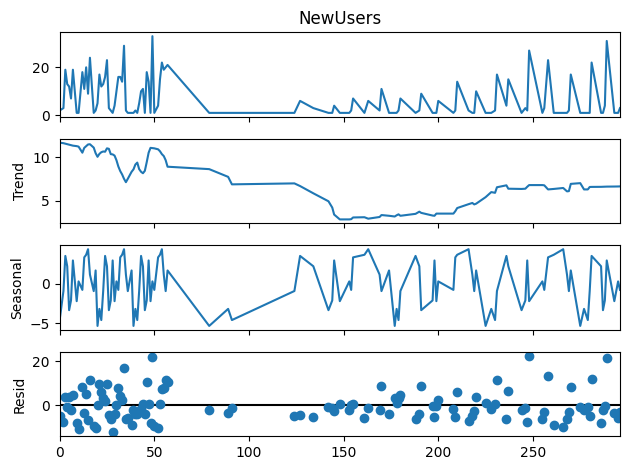

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.NewUsers, model='additive',extrapolate_trend='freq',period=18)

decompose.plot().show()

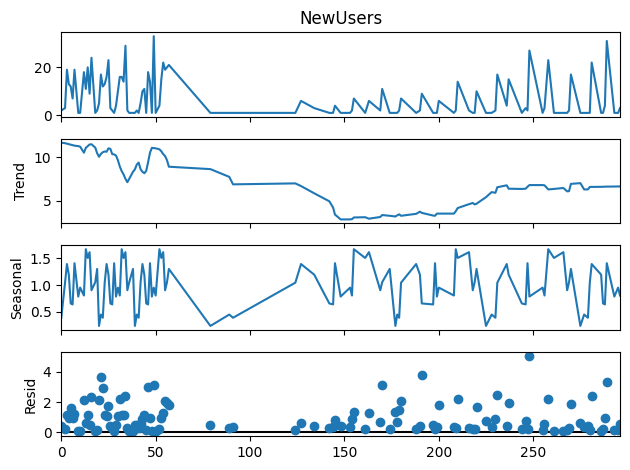

In [ ]:
decomposeMultiplicative = seasonal_decompose(df_data_train.NewUsers, model='multiplicative',extrapolate_trend='freq',period=18)

decomposeMultiplicative.plot().show()

In [ ]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds','yhat','yhat_lower','yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
131,2023-08-01,21.0,10.0,30.0
132,2023-09-01,25.0,15.0,34.0
133,2023-10-01,23.0,14.0,34.0
134,2023-11-01,27.0,17.0,36.0
135,2023-12-01,27.0,17.0,37.0


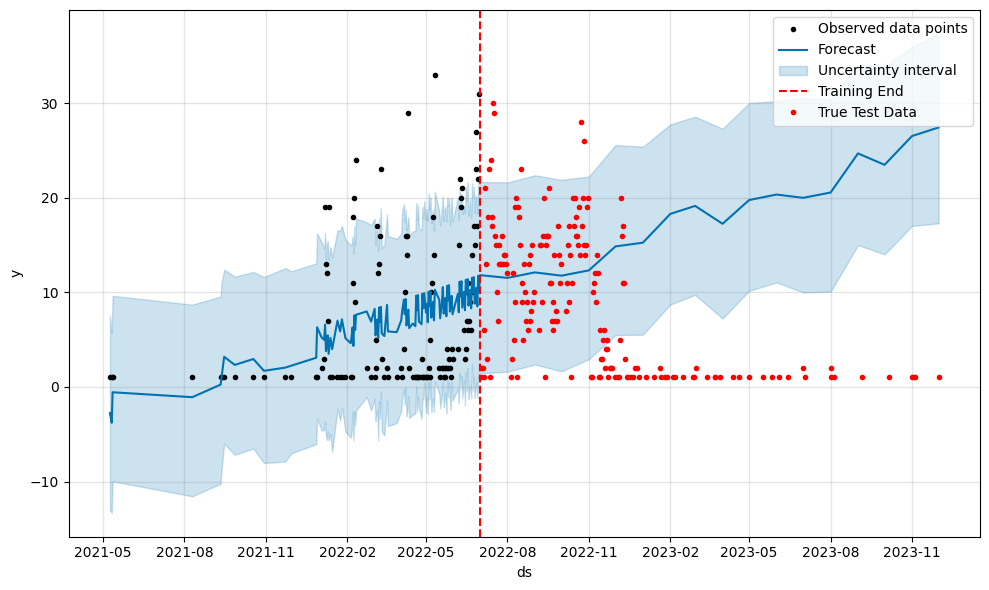

In [ ]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-18]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
df_data_test['Join Date'] = pd.to_datetime(df_data_test['Join Date'])
plt.plot(df_data_test['Join Date'], df_data_test['NewUsers'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()